<center>
<h4>Diplomatura en CDAAyA 2018 - FaMAF - UNC</h4>
<h2>Análisis y Visualización de Datos</h2>
<h1>Laboratorio 1 - Vida Urbana Versus Vida Rural</h1>
</center>

![title](urban-vs-rural-800x400.jpg)

En la siguiente notebook analizaremos una base de datos obtenida a partir de encuestas a personas que habitan áreas rurales y urbanas, relacionadas a distintos aspectos de su vida.

### Importación Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import statistics
import scipy as sp

### Importación Archivos y previsualización

A continuación, importamos el dataset y el significado de cada variable, de acuerdo a la encuesta:

In [3]:
ds = pd.read_csv('responses.csv' ,encoding='utf8');
print("La estructura de la matriz de datos es: {}".format(ds.shape))
ds.head()

La estructura de la matriz de datos es: (1010, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [111]:
ds_cols = pd.read_csv('columns.csv' ,encoding='utf8');
ds_cols[ds_cols['short'] == 'Weight']
ds_cols.head()

KeyError: 'short'

## Análisis de las Variables Aleatorias Edad y Peso 
### Estadísticos Descriptivos

En una primera instancia, se obtienen los estadísticos descriptivos de las variables peso y edad.

In [5]:
ds[['Age','Weight']].describe()

,Age,Weight
count,1003.000000,990.000000
mean,20.433699,66.405051
std,2.828840,13.839561
min,15.000000,41.000000
25%,19.000000,55.000000
50%,20.000000,64.000000
75%,22.000000,75.000000
max,30.000000,165.000000


In [6]:
print('Omitieron Edad: {}'.format(ds['Age'].isnull().sum()))
print('Omitieron Peso: {}'.format(ds['Weight'].isnull().sum()))
null_peso_edad = ds[(ds['Age'].isnull()) & (ds['Weight'].isnull())].shape[0]
print('Omitieron Edad y Peso: {}'.format(null_peso_edad))

Omitieron Edad: 7
Omitieron Peso: 20
Omitieron Edad y Peso: 4


Como se puede observar, **7** personas omitieron revelar su edad y **20** su peso. Además, **4** de ellas no especificaron ninguna de las dos informaciones.

El **promedio de edad** de los encuestados es de entre 20 y 21 años, con una desviación estándar de +-2.82; mientras que la **media del peso** es de 66.40 Kg, con una desviación estándar de +-13.84 Kg.

Además, el **rango de edad** de los encuestados va de 15 a 30 años, mientras que el **rango de peso** va de 41 a 165 Kg. La **mediana de la edad** es 20 años, mientras que la **mediana del peso** es 64 Kg.

In [7]:
print('Moda de Edad: {}'.format(statistics.mode(ds.Age.dropna())))
print('Moda de Peso: {}'.format(statistics.mode(ds.Weight.dropna())))

Moda de Edad: 19.0
Moda de Peso: 60.0


Vemos, además, que la **moda de la edad** es 19 años, mientras que la **moda del peso** es 60 Kg.

### Análisis Gráfico

Para analizar la **forma de la distribución** de las variables aleatórias estudiadas así como también la **existencia de outliers**, construimos dos tipos de gráficos que nos permiten representar la frecuencia de las mismas: un histograma y un boxplot.

Comenzamos por el histograma de la variable **Edad**.


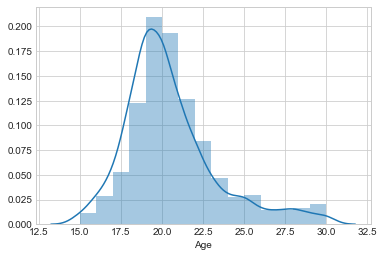

In [8]:
sns.distplot(ds.Age.dropna(), bins=15, hist=True)

El boxplot para esta misma variable:

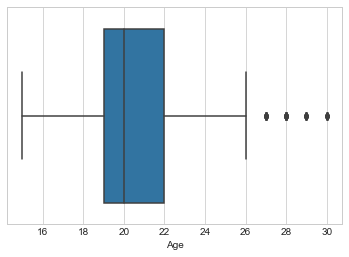

In [9]:
ax = sns.boxplot(x=ds.Age.sort_index())

Por la forma observada de la distribución y la pequeña diferencia entre media y mediana, podemos decir que la distribución de esta variable se parece a una **distribución normal*.

Sin embargo, al efectuar el siguiente **test de normalidad**, se rechaza la hipótesis nula de que se trate de una distribución normal, con una significación del 0.01: 

In [10]:
k2, p = sp.stats.normaltest(ds['Age'].dropna())
alpha = 0.01
print('p = {:g}'.format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("La hipótesis nula puede ser rechazada.")
else:
    print("La hipótesis nula no puede ser rechazada.")

p = 4.89463e-41
La hipótesis nula puede ser rechazada.


Por otro lado, también se observa la presencia de '*valores outliers*', que se alejan considerablemente de la media muestral de 20.43 años. Sin embargo, esto puede deberse a la selección de la muestra en sí, de forma que no sea representativa respecto de la población que se quiere analizar.

A continuación, realizamos el mismo análisis para la variable aleatoria **Peso**, comenzando por graficar el histograma:

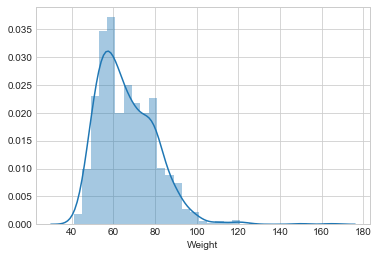

In [11]:
sns.distplot(ds.Weight.dropna(), hist=True)

Y el boxplot para esta misma variable:

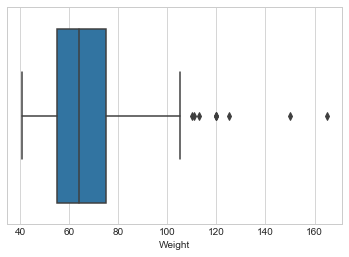

In [12]:
ax = sns.boxplot(x=ds.Weight.sort_index())

Nuevamente vemos que, por la forma observada de la distribución y la baja diferencia entre media y mediana, podemos decir que la distribución de esta variable se asimila a una **distribución normal*.

Sin embargo, cuando efectuamos el **test de normalidad** se rechaza la hipótesis nula de que se trate de una distribución normal, con una significación del 0.01:

In [13]:
k2, p = sp.stats.normaltest(ds['Weight'].dropna())
alpha = 0.01
print('p = {:g}'.format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("La hipótesis nula puede ser rechazada.")
else:
    print("La hipótesis nula no puede ser rechazada.")

p = 2.7774e-56
La hipótesis nula puede ser rechazada.


Finalmente, encontramos valores que parecen *atípicos* en esta distribución por alejarse considerablemente de las medidas de tendencia central, pero totalmente plausibles.

<div class="alert alert-block alert-info">
Analizando los histogramas, boxplot y estadísticos de las variables aleatorias peso y edad concluimos en que **ambas parecen aproximarse a una distribución normal**, ya que la media y mediana se asemejan, al igual que lo hacen las diferencias entre mediana y primer y tercer cuartil.
</div>

### *Análisis de outliers*

Analizamos la presencia de ***outliers*** tanto en la variable peso como en la edad:

__Edad__: En esta variable vemos pocos casos de outliers, lo que indica que el universo del que se tomaron las muestras estaba compuesto en su mayoría por personas de entre 15 y 25 años considerandose las personas entrevistadas con edades fuera de ese rango atípicas para la muestra.

__Peso__: En esta variable vemos gran cantidad de outliers lo que indica la presencia de individuos de la muestra con diferentes grados de sobrepeso o de deficiencia de peso, que resulta llamativo y preocupante por el rango etario de la muestra.

<div class="alert alert-block alert-info">
Sin embargo, optamos por **no descartar ningún valor atípico**, ya que, si bien parece haber outliers, los **valores son plausibles** y su caracterización como tales puede deberse a problemas en el muestreo.
</div>

## Análisis de la Edad y el Peso por Género 
### Estadísticos Descriptivos

Para empezar, calculamos los estadísticos descriptivos de la edad y el peso, discriminados por género:

In [14]:
ds.groupby('Gender')['Age',"Weight"].describe().transpose()

Gender            female        male
Age    count  589.000000  409.000000
       mean    20.113752   20.872861
       std      2.792537    2.796789
       min     15.000000   15.000000
       25%     18.000000   19.000000
       50%     20.000000   20.000000
       75%     21.000000   22.000000
       max     30.000000   30.000000
Weight count  580.000000  405.000000
       mean    58.963793   77.088889
       std     10.005719   11.349838
       min     41.000000   53.000000
       25%     53.000000   70.000000
       50%     57.000000   77.000000
       75%     63.000000   83.000000
       max    165.000000  150.000000

In [15]:
print('Moda de Edad/Femenino: {}'.format(statistics.mode(ds[ds["Gender"]=="female"].Age.dropna())))
print('Moda de Edad/Masculino: {}'.format(statistics.mode(ds[ds["Gender"]=="male"].Age.dropna())))

print('Moda de Peso/Fenenino: {}'.format(statistics.mode(ds[ds["Gender"]=="female"].Weight.dropna())))
print('Moda de Peso/Masculino: {}'.format(statistics.mode(ds[ds["Gender"]=="male"].Weight.dropna())))

Moda de Edad/Femenino: 19.0
Moda de Edad/Masculino: 19.0
Moda de Peso/Fenenino: 60.0
Moda de Peso/Masculino: 80.0


Vemos que la **media de la edad** para ambos grupos de datos es bastante similar, al igual que la desviación estándar. Además **la mediana coincide**.

Con respecto al **peso**, sí encontramos una diferencia considerable entre la **media** de ambos grupos de datos, siendo mayor la del género masculino. Lo mismo ocurre con la **mediana**, cuyo valor es mayor para el género masculino que para el femenino.

Nuevamente, tanto para la edad como para el peso, las medidas de tendencia central son parecidas.

### Análisis Gráfico

A continuación, graficamos las distribuciones de frecuencia de **la edad y el peso por género**. Comezamos por la **edad**:

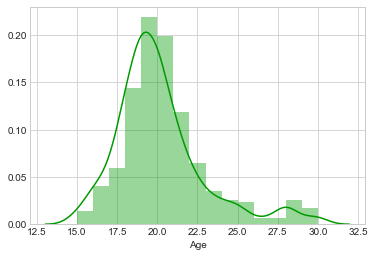

In [16]:
sns.distplot(ds[ds["Gender"]=="female"].Age.dropna(),bins=15, hist=True, rug=False, color = '#009900')

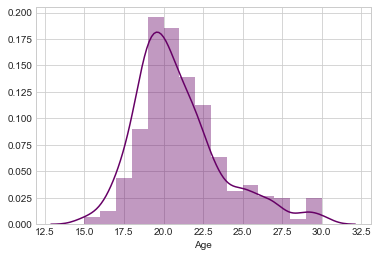

In [17]:
sns.distplot(ds[ds["Gender"]=="male"].Age.dropna(), bins=15, hist=True, rug=False, color = '#660066')

Para comparar estas distribuciones, las ubicamos en el mismo plano:

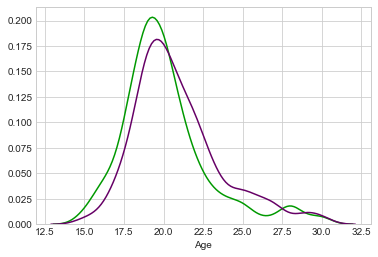

In [18]:
sns.distplot(ds[ds["Gender"]=="female"].Age.dropna(), bins=15, hist=False, rug=False, color = '#009900')
sns.distplot(ds[ds["Gender"]=="male"].Age.dropna(), bins=15, hist=False, rug=False, color = '#660066')

Además, utilizamos simultáneamente un boxplot:

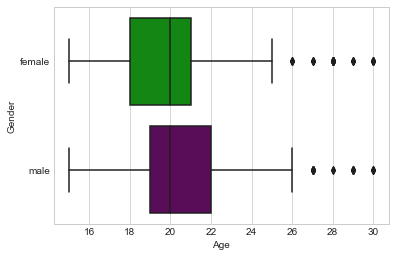

In [19]:
sns.boxplot(data=ds,x="Age", y="Gender",palette=['#009900', '#660066'])

Vemos que ambas distribuciones son muy similares. La media de la edad masculina es apenas superior a la media de la femenina. Además, el grupo femenino presenta algunos valores outliers más que el masculino.

Realizamos el mismo análisis, pero para el **peso**:

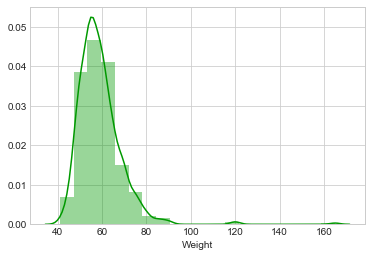

In [20]:
sns.distplot(ds[ds["Gender"]=="female"].Weight.dropna(), bins=20, hist=True, rug=False, color = '#009900')

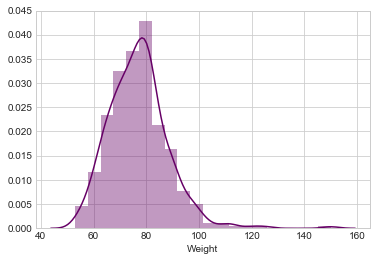

In [21]:
sns.distplot(ds[ds["Gender"]=="male"].Weight.dropna(), bins=20, hist=True, rug=False, color = '#660066')

Para comparar estas distribuciones, las ubicamos en el mismo plano:

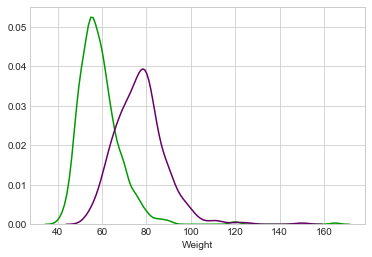

In [22]:
sns.distplot(ds[ds["Gender"]=="female"].Weight.dropna(), bins=20, hist=False, rug=False, color = '#009900')
sns.distplot(ds[ds["Gender"]=="male"].Weight.dropna(), bins=20, hist=False, rug=False, color = '#660066')

Además, graficamos también un boxplot:

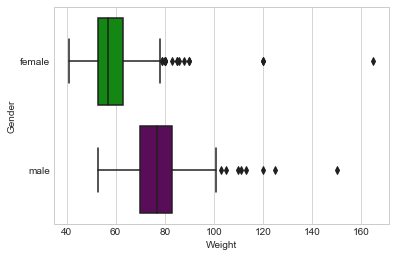

In [23]:
sns.boxplot(data=ds,x="Weight", y="Gender",palette=['#009900', '#660066'])

En este caso, **las distribuciones ya no son tan similares**. La media del peso masculino es bastante superior a la media del femenina. Además, la dispersión es menor en la distribución del peso femenino. Sin embargo, el grupo femenino presenta algunos valores outliers más que el masculino y más alejados de las medidas de tendencia central.

<div class="alert alert-block alert-info">
Podemos decir, en base a los gráficos, las medidas de tendencia central y los rangos intercuartílicos 2 y 3, que todas estas distribuciones se asemejan a una distribución normal.
</div>

### Correlación entre Edad, Peso y Género

Calculamos la correlación entre las variables previamente analizadas. Para el género, construimos una variable tipo *boolean*, en la que el género femenino es 1 y el masculino es 0. Esto nos permitirá calcular la correlación de esta variable categórica con las otras dos, que son numéricas.

In [24]:
ds['Gender_bool'] = (ds.Gender == 'female')

ds_filt_cor = ds[['Age', 'Weight', 'Gender_bool']]

ds_filt_cor.corr()

,Age,Weight,Gender_bool
Age,1.000000,0.237722,-0.134972
Weight,0.237722,1.000000,-0.639831
Gender_bool,-0.134972,-0.639831,1.000000


In [25]:
ds.groupby('Gender')['Age',"Weight"].corr()

Age    Weight
Gender                           
female Age     1.000000  0.156477
       Weight  0.156477  1.000000
male   Age     1.000000  0.253514
       Weight  0.253514  1.000000

En el siguiente gráfico, se puede ver el diagrama de dispersión de edad y peso, por género:

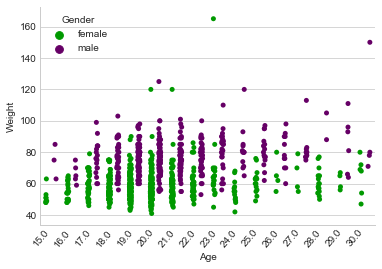

In [26]:
graph = sns.stripplot(x="Age", y="Weight", hue="Gender", data=ds, jitter=True, palette = ['#009900', '#660066'], dodge=True)
graph.set_xticklabels(graph.get_xticklabels(), rotation=50, ha="right")

sns.despine()

Tanto la tabla de correlación como el gráfico previo, nos permiten arribar a las siguientes **conclusiones**:
* Por un lado, el peso y la edad están correlacionadas positivamente, es decir, a mayor edad, mayor peso. Además, esta correlación es más marcada para el género masculino.
* Por otro lado, edad y género tienen una correlación negativa, pero no tan marcada. Esto quiere decir que a mayor edad, más probabilidades de que sea género masculino, mientras que siendo de género masculino, aumenta su edad.
* Finalmente, peso y género tienen una correlación negativa bastante marcada. Esto quiere decir que a mayor peso, más probabilidades de que sea género masculino, , mientras que siendo de género masculino, aumenta su peso.

## Análisis del Nivel de Estudio según Lugar de Residencia y Género

Para comenzar, calculamos la frecuencia relativa del nivel educativo, según el lugar de residencia:

In [73]:
fdp_ori_educ = ds.groupby('Village - town')['Education'].value_counts(normalize=True)
fdp_ori_educ.sort_index(0)

Village - town  Education                       
city            college/bachelor degree             0.214993
                currently a primary school pupil    0.007072
                doctorate degree                    0.005658
                masters degree                      0.077793
                primary school                      0.079208
                secondary school                    0.615276
village         college/bachelor degree             0.201342
                currently a primary school pupil    0.016779
                doctorate degree                    0.003356
                masters degree                      0.083893
                primary school                      0.077181
                secondary school                    0.617450
Name: Education, dtype: float64

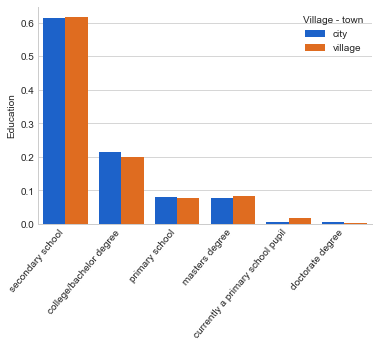

In [88]:
fdp_ori_edu_df = pd.DataFrame(fdp_ori_educ)
fdp_ori_edu_df = fdp_ori_edu_df.reset_index(0)
graph = sns.barplot(x=fdp_ori_edu_df.index.values, y='Education', hue = 'Village - town', data=fdp_ori_edu_df , palette = ['#005ce6','#ff6600'])
graph.set_xticklabels(graph.get_xticklabels(), rotation=50, ha="right")

sns.despine()

Vemos que la proporción por nivel educativo alcanzado es bastante similar para los dos lugares de recidencia. Esto es un **indicio de que las variables son independientes**. Sin embargo, vamos a realizar un **test Chi-Cuadrado para validar la independencia de variables categóricas**. En este caso, la **hipótesis nula** es que el **nivel educativo es independiente del origen de la persona encuestada**.

In [89]:
dep_place_education = pd.crosstab(index = ds['Village - town'], columns=ds.Education, normalize=True, margins=True)
dep_place_education.transpose()

Village - town,city,village,All
Education,,,
college/bachelor degree,0.151244,0.059701,0.210945
currently a primary school pupil,0.004975,0.004975,0.009950
doctorate degree,0.003980,0.000995,0.004975
masters degree,0.054726,0.024876,0.079602
primary school,0.055721,0.022886,0.078607
secondary school,0.432836,0.183085,0.615920
All,0.703483,0.296517,1.000000


In [314]:
dep_place_education = pd.crosstab(index = ds['Village - town'], columns=ds.Education, normalize=True, margins=False)
chi2, p_value, dof, ex = sp.stats.chi2_contingency(dep_place_education)
alpha = 0.01
print('p = {}'.format(p_value))
if 1 - p_value > alpha:
    print("La hipótesis nula puede ser rechazada. Hay dependencia entre las variables")
else:
    print("La hipótesis nula no puede ser rechazada. No se rechaza la independencia entre las variables.")

p = 0.9999999835328564
La hipótesis nula no puede ser rechazada. No se rechaza la independencia entre las variables.


Luego, **no podemos rechazar que las variables sean independientes**, con un 0.01 de significancia estadística.

Consideramos interesante también analzar la relación entre el **género de la persona encuestada y su nivel educativo**:

In [79]:
fdp_gender_education = ds.groupby('Gender')['Education'].value_counts(normalize=True)
fdp_gender_education.sort_index(0)

Gender  Education                       
female  college/bachelor degree             0.207770
        currently a primary school pupil    0.010135
        masters degree                      0.074324
        primary school                      0.091216
        secondary school                    0.616554
male    college/bachelor degree             0.216545
        currently a primary school pupil    0.009732
        doctorate degree                    0.012165
        masters degree                      0.087591
        primary school                      0.058394
        secondary school                    0.615572
Name: Education, dtype: float64

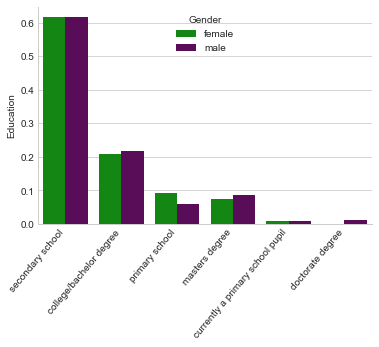

In [86]:
fdp_gen_edu_df = pd.DataFrame(fdp_gender_education)
fdp_gen_edu_df = fdp_gen_edu_df.reset_index(0)
graph = sns.barplot(x=fdp_gen_edu_df.index.values, y='Education', hue = 'Gender', data=fdp_gen_edu_df , palette = ['#009900', '#660066'])
graph.set_xticklabels(graph.get_xticklabels(), rotation=50, ha="right")

sns.despine()

Vemos que la proporción por nivel educativo alcanzado varía por género, aunque no tan pronunciadamente. Para analizar la dependencia o independencia de estas variables, realizamos un **test Chi-Cuadrado** nuevamente. En este caso, la **hipótesis nula** es que el **nivel educativo es independiente del género de la persona encuestada**.

In [91]:
dep_gender_education= pd.crosstab(index=ds.Gender,columns=ds.Education, normalize=True, margins=True)
dep_gender_education.transpose()

Gender,female,male,All
Education,,,
college/bachelor degree,0.122632,0.088734,0.211366
currently a primary school pupil,0.005982,0.003988,0.009970
doctorate degree,0.000000,0.004985,0.004985
masters degree,0.043868,0.035892,0.079761
primary school,0.053838,0.023928,0.077767
secondary school,0.363908,0.252243,0.616152
All,0.590229,0.409771,1.000000


In [92]:
dep_gender_education = pd.crosstab(index=ds.Gender,columns=ds.Education, normalize=True, margins=False)
chi2, p_value, dof, ex = sp.stats.chi2_contingency(dep_gender_education)
alpha = 0.01
print('p = {}'.format(p_value))
if 1 - p_value > alpha:
    print("La hipótesis nula puede ser rechazada. Hay dependencia entre las variables")
else:
    print("La hipótesis nula no puede ser rechazada. No se rechaza la independencia entre las variables.")

p = 0.9999993033995688
La hipótesis nula no puede ser rechazada. No se rechaza la independencia entre las variables.


Luego, **no podemos rechazar que las variables sean independientes**, con un 0.01 de significancia estadística.

<div class="alert alert-block alert-info">
En **conclusión**, podemos decir que el nivel educativo alcanzado es independiente del lugar de residencia, así como también del género de las personas encuestadas.
</div>

## Análisis de Consumo de Alcohol y Hábitos de Tabaquismo

Para comenzar, calculamos las **probabilidades marginales y conjuntas** de consumo de alcohol y tabaquismo.

In [248]:
fdp_smoke = ds.Smoking.value_counts(normalize=True)
fdp_smoke

tried smoking     0.429142
never smoked      0.207585
current smoker    0.188623
former smoker     0.174651
Name: Smoking, dtype: float64

In [297]:
new_index1 = ['never smoked', 'tried smoking', 'former smoker', 'current smoker']
fdp_smoke_reind = fdp_smoke.reindex(new_index1)
fdp_smoke_reind = fdp_smoke_reind.to_frame()
fdp_smoke_reind

,Smoking
never smoked,0.207585
tried smoking,0.429142
former smoker,0.174651
current smoker,0.188623


[Text(0,0,'never smoked'),
 Text(0,0,'tried smoking'),
 Text(0,0,'former smoker'),
 Text(0,0,'current smoker')]

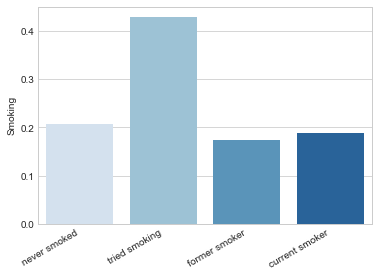

In [274]:
graph = sns.barplot(x = fdp_smoke_reind.index.values, y = 'Smoking', data = fdp_smoke_reind, palette = 'Blues')
graph.set_xticklabels(graph.get_xticklabels(), rotation=30, ha="right")

Analizando datos de la tabla de probabilidad y gráfico de las diferentes categorías de consumo vemos que **predominan en proporción las personas que no consumen cigarrillos con frecuencuencia por sobre las que sí lo hacen**.

In [275]:
fdp_alcohol = ds.Alcohol.value_counts(normalize=True)
fdp_alcohol

social drinker    0.655721
drink a lot       0.220896
never             0.123383
Name: Alcohol, dtype: float64

In [298]:
new_index2 = ['never', 'social drinker', 'drink a lot']
fdp_alcohol_reind = fdp_alcohol.reindex(new_index2)
fdp_alcohol_reind = fdp_alcohol_reind.to_frame()
fdp_alcohol_reind

,Alcohol
never,0.123383
social drinker,0.655721
drink a lot,0.220896


[Text(0,0,'never'), Text(0,0,'social drinker'), Text(0,0,'drink a lot')]

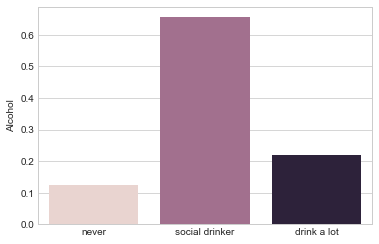

In [277]:
graph = sns.barplot(x = fdp_alcohol_reind.index.values , y = 'Alcohol', data = fdp_alcohol_reind,
                    palette = sns.cubehelix_palette(3))
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)

Con respecto al consumo de alcohol vemos que **la gran mayoría de los encuestado consume alcohol**, aunque sólo **una pequeña parte lo hace con alta frecuencia**. La mayoría de los encuestados bebe en eventos sociales.

Analizaremos ahora la **relación entre consumo de alcohol y cigarrillos** para determinar si existe o no dependencia entre estas dos variables. Calculamos, para ello, la tabla de frecuencia de probabilidades conjunta:

In [308]:
cross_alcohol_smoking = pd.crosstab(index=ds.Smoking,columns=ds.Alcohol, normalize=True, margins=False)
cross_alcohol_smoking = cross_alcohol_smoking.reindex(index = new_index1, columns = new_index2)
cross_alcohol_smoking

Alcohol,never,social drinker,drink a lot
Smoking,,,
never smoked,0.061,0.131,0.015
tried smoking,0.039,0.319,0.072
former smoker,0.011,0.109,0.055
current smoker,0.011,0.099,0.078


Construimos además el siguiente heatmap, para identificar patrones en el consumo de alcohol y tabaco:

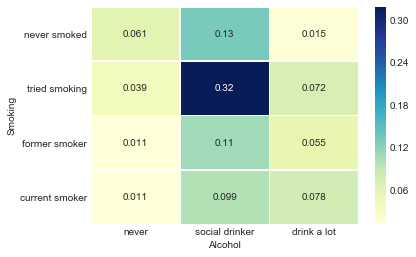

In [310]:
sns.heatmap(cross_alcohol_smoking, linewidth=0.5,cmap="YlGnBu", annot=True)

Vemos que la **mayor frecuencia relativa** se produce en las categorías **"Bebedor Social" e "Intentó Fumar"**, seguida de aquellos que nunca fumaron pero que son bebedores sociales.

También evaluamos la **independencia de las variables**, a partir del siguiente test:

In [316]:
chi2, p_value, dof, ex = sp.stats.chi2_contingency(cross_alcohol_smoking)
alpha = 0.01
print('p = {}'.format(p_value))
if (1 - p_value) > alpha:
    print("La hipótesis nula puede ser rechazada. Hay dependencia entre las variables")
else:
    print("La hipótesis nula no puede ser rechazada. No se rechaza la independencia entre las variables.")

p = 0.9999448955822006
La hipótesis nula no puede ser rechazada. No se rechaza la independencia entre las variables.


In [418]:
fdp_alc_smk = ds.groupby('Smoking')['Alcohol'].value_counts(normalize=True)
fdp_alc_smk = fdp_alc_smk.reindex(new_index1 , level=0)
fdp_alc_smk = fdp_alc_smk.reindex(new_index2 , level=1)
fdp_alc_smk

Smoking         Alcohol       
never smoked    never             0.294686
                social drinker    0.632850
                drink a lot       0.072464
tried smoking   never             0.090698
                social drinker    0.741860
                drink a lot       0.167442
former smoker   never             0.062857
                social drinker    0.622857
                drink a lot       0.314286
current smoker  never             0.058511
                social drinker    0.526596
                drink a lot       0.414894
Name: Alcohol, dtype: float64

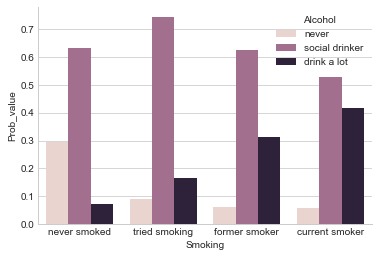

In [419]:
fdp_alc_smk_df = pd.DataFrame(fdp_alc_smk)
fdp_alc_smk_df = fdp_alc_smk_df.rename(columns={'Alcohol': 'Prob_value'})
fdp_alc_smk_df = fdp_alc_smk_df.reset_index()
graph = sns.barplot(x='Smoking', y='Prob_value', hue = 'Alcohol' , data=fdp_alc_smk_df , palette = sns.cubehelix_palette(3))
graph.set_xticklabels(graph.get_xticklabels(), rotation=0)

sns.despine()

<div class="alert alert-block alert-info">
Si bien el análisis gráfico no es tan claro, el test de independencia indica que **no existe una relación de dependencia entre el consumo de alcohol y tabaco**.
<br><br>
Este dato resulta **relevante** al momento de analizar la **variación en el consumo de cigarrillos al impedir fumar en bares**, como así tambien respecto a **qué puede ocurrir con el consumo de alcohol si disminuye la cantidad de fumadores que lo consume**.
</div>

Al calcular las **correlaciones entre categorías de consumo de alcohol y tabaco**, observamos lo siguiente:

In [502]:
join_smoking_alcohol = pd.get_dummies(ds["Smoking"]).join(pd.get_dummies(ds["Alcohol"]))
corr_smoking_alcohol = join_smoking_alcohol.corr()
corr_smoking_alcohol.drop(columns=['drink a lot','never','social drinker'],inplace=True)
corr_smoking_alcohol.drop(index=['current smoker','former smoker','never smoked','tried smoking'],inplace=True)
corr_smoking_alcohol

,current smoker,former smoker,never smoked,tried smoking
drink a lot,0.223494,0.104451,-0.181622,-0.108869
never,-0.094404,-0.083581,0.264579,-0.084154
social drinker,-0.129642,-0.028475,-0.024242,0.161626


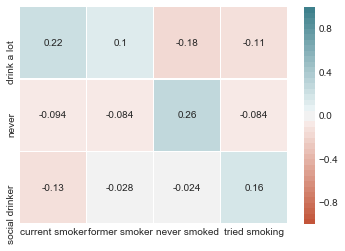

In [519]:
sns.heatmap(corr_smoking_alcohol, linewidth=0.5,cmap=sns.diverging_palette(20, 210, n=40), annot=True, vmin = -1, vmax= 1)

<div class="alert alert-block alert-info">
Al analizar el gráfico, vemos que **las correlaciones entre categorías de consumo de alcohol y tabaco, no son tan marcadas**, en línea con lo encontrado respecto a la independencia entre estas variables.
<br><br>
La correlación más fuerte se da entre aquellos que nunca fumaron y que no consumen alcohol, siendo ésta positiva. Es decir, dado que no fuma, es más probable que no consuma alcohol y viceversa.
</div>

<div class="alert alert-block alert-info">
En base a los datos analizados, podríamos concluir que **si se prohibiese fumar en los bares, esto no afectaría los niveles de consumo de alcohol, o bien el impacto sería despreciable**, dada la independencia entre tales variables y la escasa correlación que muestran.
<br>
No debe dejarse de tener en cuenta que esta conclusión sólo es válida siempre que nos limitemos a la población y espacio geográfico desde donde fue extraida la muestra.
<br><br>
Por otro lado, si disminuye la cantidad de fumadores que consumen alcohol, al observar la probabilidad condicional vemos que **los fumadores representan una parte importante en las categorías de alto consumo de alcohol**. Por lo tanto, podría tener un **impacto negativo considerable en la cantidad consumida de alcohol**. 
</div>

### Análisis de Consumo de Alcohol por Género y de Tabaquismo por Edad y Género

Para analizar el consumo de alcohol por género, obtenemos las frecuencias condicionales según el género:

In [470]:
fdp_gender_alcohol = ds.groupby('Gender')['Alcohol'].value_counts(normalize=True)
fdp_gender_alcohol.sort_index(0)

Gender  Alcohol       
female  drink a lot       0.176271
        never             0.115254
        social drinker    0.708475
male    drink a lot       0.286064
        never             0.134474
        social drinker    0.579462
Name: Alcohol, dtype: float64

In [471]:
fdp_gen_alc_df = pd.DataFrame(fdp_gender_alcohol)
fdp_gen_alc_df = fdp_gen_alc_df.rename(columns={'Alcohol': 'Prob_value'})
fdp_gen_alc_df = fdp_gen_alc_df.reset_index()
fdp_gen_alc_df

,Gender,Alcohol,Prob_value
0,female,social drinker,0.708475
1,female,drink a lot,0.176271
2,female,never,0.115254
3,male,social drinker,0.579462
4,male,drink a lot,0.286064
5,male,never,0.134474


In [493]:
fdp_gen_alc = fdp_gen_alc_df.set_index(['Gender','Alcohol'])
fdp_gen_alc = fdp_gen_alc.reindex(new_index2, level=1)
fdp_gen_alc = fdp_gen_alc.reset_index()
fdp_gen_alc

,Gender,Alcohol,Prob_value
0,female,never,0.115254
1,female,social drinker,0.708475
2,female,drink a lot,0.176271
3,male,never,0.134474
4,male,social drinker,0.579462
5,male,drink a lot,0.286064


In [500]:
fdp_gen_alc_piv = fdp_gen_alc.pivot(index = 'Gender', columns = 'Alcohol', values = 'Prob_value')
fdp_gen_alc_piv = fdp_gen_alc_piv[['never','social drinker','drink a lot']]
fdp_gen_alc_piv

Alcohol,never,social drinker,drink a lot
Gender,,,
female,0.115254,0.708475,0.176271
male,0.134474,0.579462,0.286064


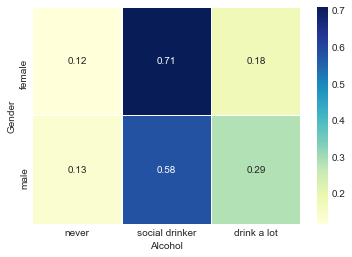

In [501]:
sns.heatmap(fdp_gen_alc_piv, linewidth=0.5,cmap="YlGnBu", annot=True)

<div class="alert alert-block alert-info">
Een conclusión, vemos que el **consumo social de alcohol** es considerablemente más fuerte en el género femenino que en el masculino, mientras que la proporción de quienes no consumen alcohol es similar para ambos géneros.
</div>

Para analizar el consumo de tabaco por edad, obtenemos las frecuencias conjuntas, para graficar la distribución de acuerdo a las categorías de consumo:

In [503]:
cross_age_smoking = pd.crosstab(index=ds.Smoking,columns=ds.Age, normalize=True, margins=False)
cross_age_smoking.reindex(new_index1)

Age,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Smoking,,,,,,,,,,,,,,,,
never smoked,0.006030,0.012060,0.019095,0.025126,0.043216,0.030151,0.018090,0.011055,0.007035,0.01206,0.007035,0.003015,0.003015,0.003015,0.002010,0.002010
tried smoking,0.004020,0.010050,0.017085,0.056281,0.090452,0.098492,0.054271,0.047236,0.013065,0.00804,0.014070,0.003015,0.008040,0.003015,0.003015,0.001005
former smoker,0.000000,0.006030,0.007035,0.022111,0.036181,0.023116,0.030151,0.012060,0.009045,0.00402,0.004020,0.005025,0.002010,0.007035,0.004020,0.004020
current smoker,0.001005,0.001005,0.010050,0.019095,0.038191,0.041206,0.025126,0.014070,0.017085,0.00402,0.005025,0.004020,0.001005,0.003015,0.002010,0.003015


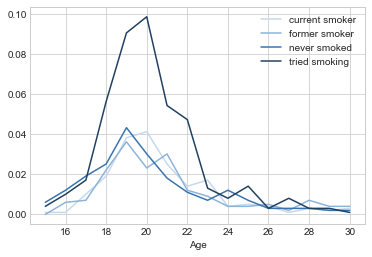

In [504]:
plt.plot(cross_age_smoking.axes[1],cross_age_smoking.values[0], '#c6d9ec')
plt.plot(cross_age_smoking.axes[1],cross_age_smoking.values[1], '#8cb3d9')
plt.plot(cross_age_smoking.axes[1],cross_age_smoking.values[2], '#3973ac')
plt.plot(cross_age_smoking.axes[1],cross_age_smoking.values[3], '#204060')
plt.legend(cross_age_smoking.axes[0])
plt.xlabel('Age')
plt.show()

<div class="alert alert-block alert-info">
En este caso, vemos como la frecuencia aumenta considerablemente, entre las edades de 18 y 22 años, para la categoría "Intentaron Fumar".
</div>

Para analizar el consumo de alcohol por edad, obtenemos las frecuencias conjuntas, para graficar la distribución de acuerdo a las categorías de consumo:

In [505]:
cross_age_alcohol = pd.crosstab(index=ds.Alcohol,columns=ds.Age, normalize=True, margins=False)
cross_age_alcohol = cross_age_alcohol.reindex(new_index2)
cross_age_alcohol

Age,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0
Alcohol,,,,,,,,,,,,,,,,
never,0.006012,0.013026,0.010020,0.006012,0.020040,0.015030,0.015030,0.011022,0.005010,0.006012,0.002004,0.004008,0.002004,0.001002,0.001002,0.004008
social drinker,0.004008,0.015030,0.031062,0.091182,0.133267,0.145291,0.081162,0.053106,0.029058,0.016032,0.018036,0.008016,0.010020,0.012024,0.007014,0.002004
drink a lot,0.001002,0.001002,0.012024,0.024048,0.056112,0.033066,0.031062,0.020040,0.012024,0.006012,0.010020,0.003006,0.002004,0.004008,0.003006,0.004008


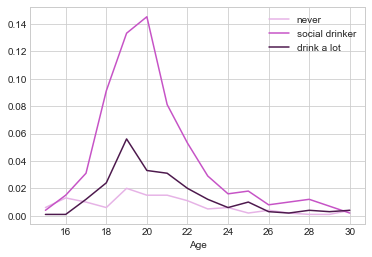

In [506]:
plt.plot(cross_age_alcohol.axes[1],cross_age_alcohol.values[0], '#e6b3e6')
plt.plot(cross_age_alcohol.axes[1],cross_age_alcohol.values[1], '#c653c6')
plt.plot(cross_age_alcohol.axes[1],cross_age_alcohol.values[2], '#4d194d')

plt.legend(cross_age_alcohol.axes[0])
plt.xlabel('Age')
plt.show()

<div class="alert alert-block alert-info">
Por último, vemos nuevamente que la frecuencia aumenta considerablemente, entre las edades de 17 y 24 años, para la categoría "Bebedor/a Social".
</div>